# ARIMA Model on Dow Jones Industrial Averages

## __IMPORTANT: This project is 100% done by Max Hong Ka Ho serving as academic study of the stock market and any results in this project should not be treated as investment advices for any individuals__

### What is Auto Regressive Model(AR)?

#### AR is a time-series statistical model aimmed at doing prediction of future time-series variable from the past data of the same type, the past data will be explanatory variable while the data in future will be dependent variable
#### It can be represented as:

#### $x_t = \phi_0 + \phi_1x_{t-1} + \phi_2x_{t-2} + ... + \phi_px_{t-p} + \epsilon_t$
#### where x_i is the time-series variable at the time t,
#### {$\epsilon_t$} is a white noise series satisfying the following:
#### E($\epsilon_t$) = 0 ; Var($\epsilon_t$) = $\sigma^2_{\epsilon}$ ; E($\epsilon_t\epsilon_s$) = 0, $\forall s \neq t$ 

### What is Moving Average Model(MA)?

#### MA is a time-series statistical model trying to explain the future time-series variable with the moving average of q level and the weighted prediction error from the moving average
#### It can be represented as:

#### $x_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + ... + \theta_q\epsilon_{t-q}$
#### where x_i is the time-series variable at the time t,
#### {$\epsilon_t$} is a white noise series satisfying the following:
#### E($\epsilon_t$) = 0 ; Var($\epsilon_t$) = $\sigma^2_{\epsilon}$ ; E($\epsilon_t\epsilon_s$) = 0, $\forall s \neq t$ 

#### Therefore, MA has the following properties:
#### 1. E($x_t$) = \mu 
#### 2. Var($x_t$) = $(1 + \theta^2_1 + \theta^2_2 + ... + \theta^2_q)\sigma^2_{\epsilon}$

### What is ARIMA Model(ARIMA)?

#### ARIMA is a time-series statistical model combining the AR and MA to explain the future time-series variable with the past p periods historical value of x and the q periods error value in the estimation procedure

#### It can be represented as:

#### $x_t = \phi_0 + \phi_1x_{t-1} + \phi_2x_{t-2} + ... + \phi_px_{t-p} + \epsilon_t+ \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + ... + \theta_q\epsilon_{t-q}$

#### {$\epsilon_t$} is a white noise series satisfying the following:
#### E($\epsilon_t$) = 0 ; Var($\epsilon_t$) = $\sigma^2_{\epsilon}$ ; E($\epsilon_t\epsilon_s$) = 0, $\forall s \neq t$ 

## __Steps to build the ARIMA Model:__
### 1. Series Classification:
#### (a) We need to determine whether the series is a stationary time series. If it isn't, we need to convert it into a stationary one
#### (b) Determine whether the series is white noise. If it is, then we should stop immediately since white noise series is impossible to form ARIMA model
### 2. Model Specification:
#### Determine the values of p and q, they should be determined by the Autocorrelation Coefficient Function(ACF) and Partial Autocorrelation Coefficient Function(PACF)
### 3. Model Testing:
#### Test if the residual follows the white noise series properties and if it is, we can out the data into our model

### Desciption:
#### In this project, I approach the Dow Jones Industrial Averages with ARIMA Model to use it as a signal to trade the Dow Jones Industrial Averages and let's see how it performs!! We would use 2010 Jan 1- 2020 Jan 1 data in our experiment, where we would split it into half so that the 2010-2015 data is treated as training data while the 2016 - 2020 data will be our testing data

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch.unitroot import ADF
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import *

In [2]:
#read the data
dji = pd.read_csv("DJI.csv").dropna()
dji.index = pd.to_datetime(dji['Date'])

In [3]:
#look at the first 5 datas in the data
dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-04,2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000


In [4]:
#select the training data
train = dji['2010':'2015']
#select the test data
test = dji['2016':'2020']

In [5]:
#see if we have splited it successfully
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2015-12-24,2015-12-24,17593.259766,17606.339844,17543.949219,17552.169922,17552.169922,40350000
2015-12-28,2015-12-28,17535.660156,17536.900391,17437.339844,17528.269531,17528.269531,59770000
2015-12-29,2015-12-29,17547.369141,17750.019531,17547.369141,17720.980469,17720.980469,69860000
2015-12-30,2015-12-30,17711.939453,17714.130859,17588.869141,17603.869141,17603.869141,59760000
2015-12-31,2015-12-31,17590.660156,17590.660156,17421.160156,17425.029297,17425.029297,93690000


In [6]:
test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-12-24,2019-12-24,28572.570313,28576.800781,28503.210938,28515.449219,28515.449219,86150000
2019-12-26,2019-12-26,28539.460938,28624.099609,28535.150391,28621.390625,28621.390625,155970000
2019-12-27,2019-12-27,28675.339844,28701.660156,28608.980469,28645.259766,28645.259766,182280000
2019-12-30,2019-12-30,28654.759766,28664.689453,28428.980469,28462.140625,28462.140625,181600000
2019-12-31,2019-12-31,28414.640625,28547.349609,28376.490234,28538.439453,28538.439453,193340000


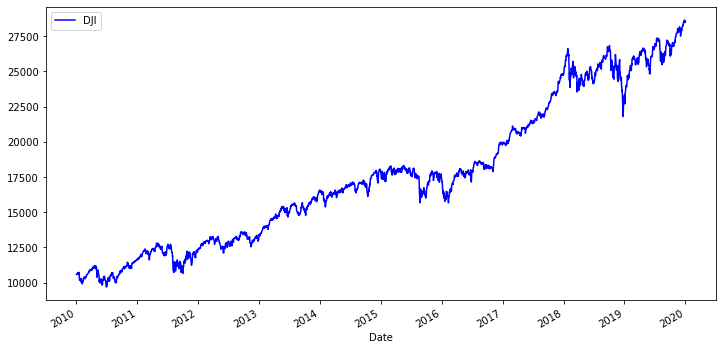

In [7]:
# take a look at the time series data of close
dji['Close'].plot(figsize = (12, 6), color = 'b', label = 'DJI')
plt.legend()

In [8]:
# check if the time series is stationary
closetrain = train['Close'].values
print(ADF(closetrain, max_lags = 10).summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.879
P-value                         0.795
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### The above is the ADF Hypothesis Testing which is used to test if the data is stationary. We can see that our close data is not stationary with p-value = 0.795 > 0.05, so it is statistically significant that the close series is nonstationary at 5%, 10% signifiance level and we should do some treatment before continuing the next analysis

#### Let's take a look on the ACF graph

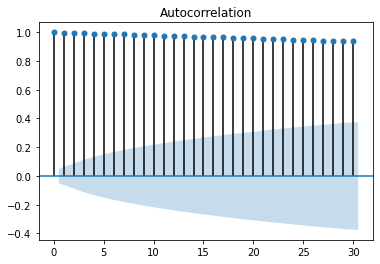

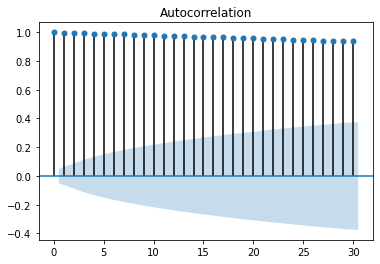

In [9]:
plot_acf(closetrain, use_vlines = True, lags = 30)

#### We can see from the ACF graph that the time-series variable are highly autocorrelated, that means our first assumption fails - the explanatory var should be a stationary time-series

## How to solve this issue?
#### We would use the Lag Operator Method to achieve a stationary time-series
### What is Lag Operator Method?
#### If a series is non-stationary, but after d times of their differnece it would become a stationary time- series data, then the data is denoted as I(d), where I denotes Integrated and $d\in\mathbb{N}$
#### i.e we could consider $\Delta x_t = x_t - x_{t-1}$ which is the return of the stock price

In [10]:
#we would redefine the data set
close = dji['Close']
ret = (close - close.shift(1)) / close.shift(1)
ret = ret.dropna()

In [11]:
#take a look at the ret data
ret.head()

Date
2010-01-05   -0.001128
2010-01-06    0.000157
2010-01-07    0.003138
2010-01-08    0.001068
2010-01-11    0.004313
Name: Close, dtype: float64

In [12]:
# check if the ret satisfy the assumption of stationary series
ret_value = ret.values
print(ADF(ret_value, max_lags = 10).summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -24.969
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


#### Great! We have successfully convert the non-stationary close price to the stationary return series( with p-value = 0 < 0.05, so it is significant at 5% level that the return is stationary) and we can continue our journey. 

In [13]:
#reselect the train and test data
train = ret['2010':'2015']
test = ret['2016':'2020']

#### Next we would test if the ret is a white noise with the Ljung-Box Hypothesis Testing

In [14]:
LjungBox = stattools.q_stat(stattools.acf(train)[1:12], len(train))
LjungBox[1][-1]

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


0.01048365092481007

#### The hypothesis testing shows the p-value is 0.01 < 0.05, so that we can reject the null that asserts ret is white noise

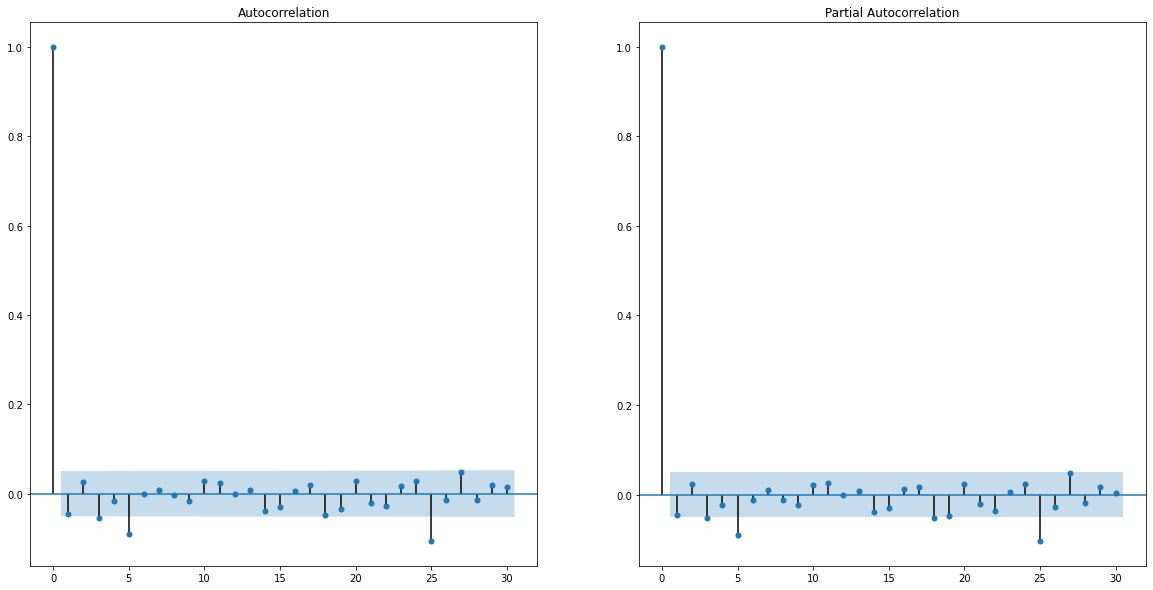

In [15]:
# Look at the ACF and PACF model
plt.figure(figsize = (20, 10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
plot1 = plot_acf(train, lags = 30, ax = ax1)
plot1 = plot_pacf(train, lags = 30, ax = ax2)

In [16]:
#take a look if we set p = 1, q = 1
from statsmodels.tsa import arima_model
model1 = arima_model.ARIMA(train, order = (1,1,1)).fit()
model1.summary()

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1508
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4917.317
Method:                       css-mle   S.D. of innovations              0.009
Date:                Tue, 28 Jul 2020   AIC                          -9826.634
Time:                        18:41:27   BIC                          -9805.359
Sample:                             1   HQIC                         -9818.710
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.538e-07   5.23e-07     -0.294      0.769   -1.18e-06    8.72e-07
ar.L1.D.Close    -0.0457      0.026     -1.776      0.076      -0.096       0.005
ma.L1.D.Close    -1.0000      0.002   -569.725      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -21.8805           +0.0000j           21.8805            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

#### We would choose the model with the smallest AIC 

In [39]:
#WARNING: This code will run your computer for 2 hours more
# create a for loop to create model range from p = 1 - 10 and q = 1 - 10
model = []
i_set = []
j_set = []
for i in range(1, 11): #i denotes the p
    i_set.append(i)
    for j in range(1, 11): #j denotes the q
        j_set.append(j)
        test = arima_model.ARIMA(train, order = (i,0,j)).fit().aic
        model.append(test)

index = model.index(min(model))        

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information a

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasti

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimi

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasti

IndexError: list index out of range

In [30]:
print("The corresponding i = ", i_set[5], ", j = ", j_set[52]," and the smallest AIC is ", min(model))

The corresponding i =  6 , j =  3  and the smallest AIC is  -9869.20991807


In [51]:
#take a look at the model aic values
np.transpose(model)

array([-9846.03835793, -9844.04830816, -9848.81306426, -9850.48396651,
       -9851.99877055, -9850.04221658, -9848.27042263, -9846.37736055,
       -9845.57724115, -9844.36280848, -9844.04765206, -9853.47663732,
       -9851.70784295, -9849.95759343, -9850.69362947, -9848.75601467,
       -9853.83008937, -9851.86649262, -9863.09889324, -9850.43016428,
       -9849.03897332, -9851.70217795, -9850.34713818, -9848.61321883,
       -9848.868948  , -9854.70834833, -9845.01346403, -9849.66737915,
       -9850.05094506, -9848.76445993, -9847.13199295, -9849.92716124,
       -9847.11318663, -9855.48511461, -9853.72576084, -9852.01138868,
       -9849.70862308, -9847.84305806, -9846.74410049, -9846.93489921,
       -9851.94327051, -9850.05801081, -9867.01029704, -9866.2299729 ,
       -9850.44109467, -9849.86980052, -9857.98574227, -9859.81261689,
       -9857.07804982, -9856.49813208, -9850.08316229, -9848.38138229,
       -9869.20991807, -9863.69722515, -9862.66661281, -9861.1220979 ,
      

In [56]:
#index is?
index

52

#### We can see that, using the past data, we would be the best to use the parameter p = 6, q = 3 in order to attain the best ARIMA model by comparing the AIC values

### Backtest:
#### We would use the 365 trading dates before 2015-01-02 as the training data for the first forecast, each forecast would be tomorrow's return. Then we would train the model again with inclusion of todays return after today's close price has been unfolded. This is a dynamic strategy trying to mimic the real situation of human practice to re-train the model consistently and let's see how the predictions are. Because of the limitation of calculating speed, here we would just demonstrate the 2015-2016 ARIMA Model backtest

In [51]:
#choose the data to be tested
train2015 = ret['2015' : '2016']
train2015

Date
2015-01-02    0.000557
2015-01-05   -0.018580
2015-01-06   -0.007428
2015-01-07    0.012254
2015-01-08    0.018388
                ...   
2016-12-23    0.000750
2016-12-27    0.000563
2016-12-28   -0.005583
2016-12-29   -0.000701
2016-12-30   -0.002885
Name: Close, Length: 504, dtype: float64

In [50]:
#look at the length of the 2010 to 2014 data
len(ret[:'2014'])

1257

In [53]:
#look the 1257th data, and that is the first data of 2015
ret[1257]

0.000556577560756471

In [71]:
#WARNING: This code will run your computer for 2 hours more
predictions = []
for i in range(0, len(train2015)):
    train = ret.iloc[1257 - 365 : 1257 + i]
    model = arima_model.ARIMA(train, order = (6,0,3)).fit(transparams=False) 
    yhat = model.forecast(1)[0][0]
    predictions.append(yhat)

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: overflow encountered in square
  Z_mat, R_mat, T_mat)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: invalid value encountered in true_divide
  Z_mat, R_mat, T_mat)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been pr

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimi

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information a

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\sit

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimi

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimi

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimi

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimi

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information a

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information a

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information a

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\

C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Hp User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [73]:
#take a look at the prediction array
predictions[1:11]

[-0.0016826176115330846,
 0.0009074670037064842,
 -0.0030376745569202328,
 -0.0011561129662142795,
 0.0033311273868924423,
 0.005830498668336402,
 0.0010110272390618756,
 0.001984995230130099,
 -0.002231447864357973,
 -0.0010756272233656359]

In [84]:
#combine the actual return and the predicted return into a DataFrame
Return = pd.DataFrame({'Close':dji.Close['2015':'2016'],
                       'Return': train2015,
                       'Predicted Return': np.array(predictions)},
                      index = train2015.index)

In [85]:
#take a look at the series
Return.head()

,Close,Return,Predicted Return
Date,,,
2015-01-02,17832.990234,0.000557,-0.002502
2015-01-05,17501.650391,-0.018580,-0.001683
2015-01-06,17371.640625,-0.007428,0.000907
2015-01-07,17584.519531,0.012254,-0.003038
2015-01-08,17907.869141,0.018388,-0.001156


In [89]:
#create a predicted stock price column
Return['Predicted Close'] = (1 + Return['Predicted Return']).cumprod() * dji['Close']['2014-12-31']
Return.head()

,Close,Return,Predicted Return,Predicted Close
Date,,,,
2015-01-02,17832.990234,0.000557,-0.002502,17778.477827
2015-01-05,17501.650391,-0.018580,-0.001683,17748.563447
2015-01-06,17371.640625,-0.007428,0.000907,17764.669682
2015-01-07,17584.519531,0.012254,-0.003038,17710.706397
2015-01-08,17907.869141,0.018388,-0.001156,17690.230820


In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [93]:
#take a look at the R square of the
correlation_matrix = np.corrcoef(Return['Return'], Return['Predicted Return'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.009928056408536818


In [123]:
# Calculate the Mean Squared Error of return
mean_squared_error(train2015, predictions)

8.470847336440849e-05

In [124]:
mean_squared_error(Return['Predicted Close'], Return['Close'])

13490669.65308465

#### Sadly, we have found that the R square is very low
#### Next, we would construct the trading strategy based on the predicted return signal: if the predicted return is positive, we would long the DJI while shorting the DJI if we have gotten a negative predicted return

In [94]:
Return['Signal'] = [1 if Return['Predicted Return'][i] > 0 else -1 for i in range(len(Return['Close']))]
Return.head()

,Close,Return,Predicted Return,Predicted Close,Signal
Date,,,,,
2015-01-02,17832.990234,0.000557,-0.002502,17778.477827,-1
2015-01-05,17501.650391,-0.018580,-0.001683,17748.563447,-1
2015-01-06,17371.640625,-0.007428,0.000907,17764.669682,1
2015-01-07,17584.519531,0.012254,-0.003038,17710.706397,-1
2015-01-08,17907.869141,0.018388,-0.001156,17690.230820,-1


In [104]:
#Locate the Buy and Sell Signal Position
Buy_Sig = [0]
Sell_Sig = [1]
for i in range(1, len(Return['Signal'])):
    if Return['Signal'][i] == 1 and Return['Signal'][i - 1] == -1:
        Buy_Sig.append(1)
    else:
        Buy_Sig.append(0)
for i in range(1, len(Return['Signal'])):
    if Return['Signal'][i] == -1 and Return['Signal'][i - 1] == 1:
        Sell_Sig.append(1)
    else:
        Sell_Sig.append(0)        

In [105]:
Buy_Sig = np.array(Buy_Sig)
Sell_Sig = np.array(Sell_Sig)

In [106]:
Buy_Sig

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [107]:
Sell_Sig

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [108]:
#concat them into the Return DataFrame
Return['Buy_Sig'] = Buy_Sig
Return['Sell_Sig'] = Sell_Sig

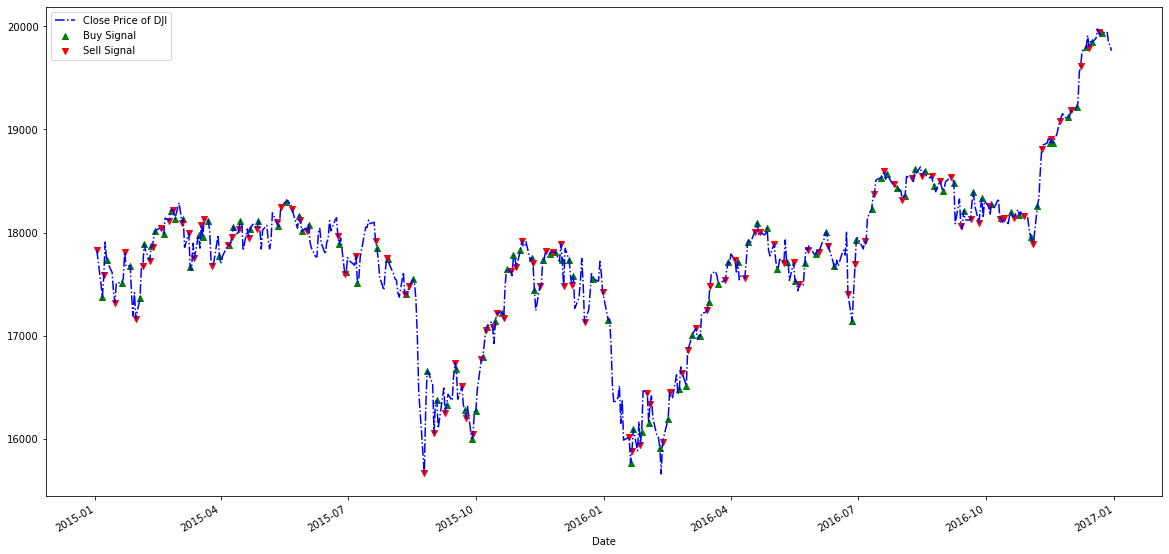

In [116]:
#Plot the Close Price Graph with signal
plt.figure(figsize = (20, 10))
Return['Close'].plot(color = 'b', linestyle = '-.', label = 'Close Price of DJI')
plt.scatter(Return['Buy_Sig'][Return['Buy_Sig'] == 1].index, Return['Close'][Return['Buy_Sig'][Return['Buy_Sig'] == 1].index], color = 'g', marker = '^', label = 'Buy Signal')
plt.scatter(Return['Sell_Sig'][Return['Sell_Sig'] == 1].index, Return['Close'][Return['Sell_Sig'][Return['Sell_Sig'] == 1].index], color = 'r', marker = 'v', label = 'Sell Signal')
plt.legend()

In [117]:
#Create another columns for the trade return
Return['Trade Return'] = Return['Signal'] * Return['Return']

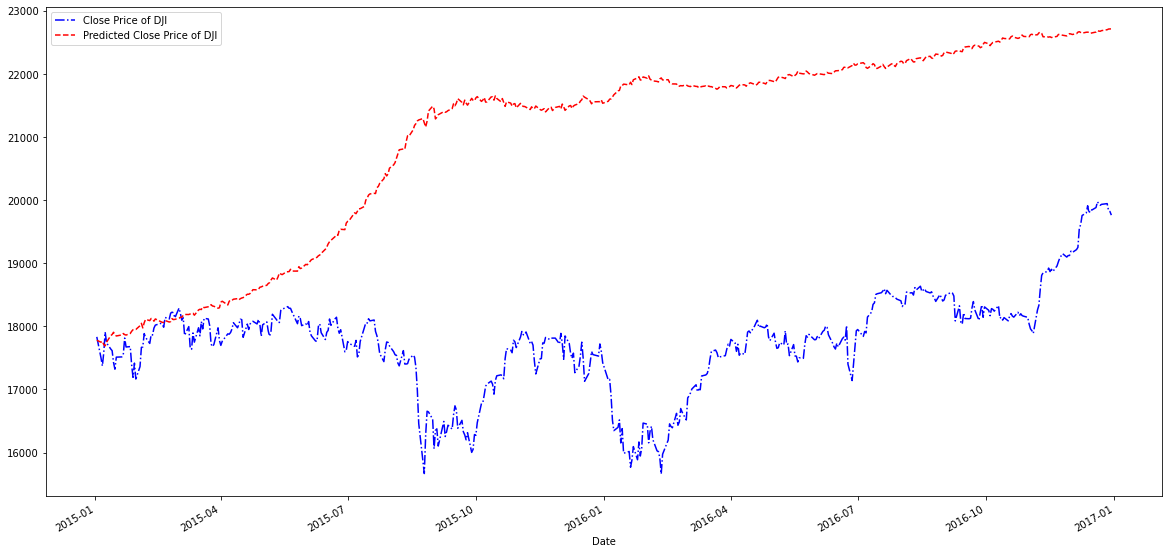

In [122]:
#Take a look at the predicted Close and Real Close
plt.figure(figsize = (20, 10))
Return['Close'].plot(color = 'b', linestyle = '-.', label = 'Close Price of DJI')
Return['Predicted Close'].plot(color = 'r', linestyle = '--', label = 'Predicted Close Price of DJI')
plt.legend(loc = 'best')

#### We can observe that the predicted stock price is not accurate

In [125]:
# Let's compare the return of the DJI and ARIMA signal strategy
#first import our accustomed library used in other projects
def Sharpe_Ratio(ret_series, rf):
    mean = (1 + ret_series).prod()**(1 / len(ret_series[ret_series != 0])) - 1
    std = np.std(ret_series) * len(ret_series) / len(ret_series[ret_series != 0])
    return (mean - rf) / std
    
def backtest(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """ #documetation string
    wealth_index = 10000*(1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth" : wealth_index,
        "Peaks" : previous_peaks,
        "Drawdown" : drawdowns
    })

In [129]:
trade_result = backtest(Return['Trade Return'])
DJI_result = backtest(Return['Return'])

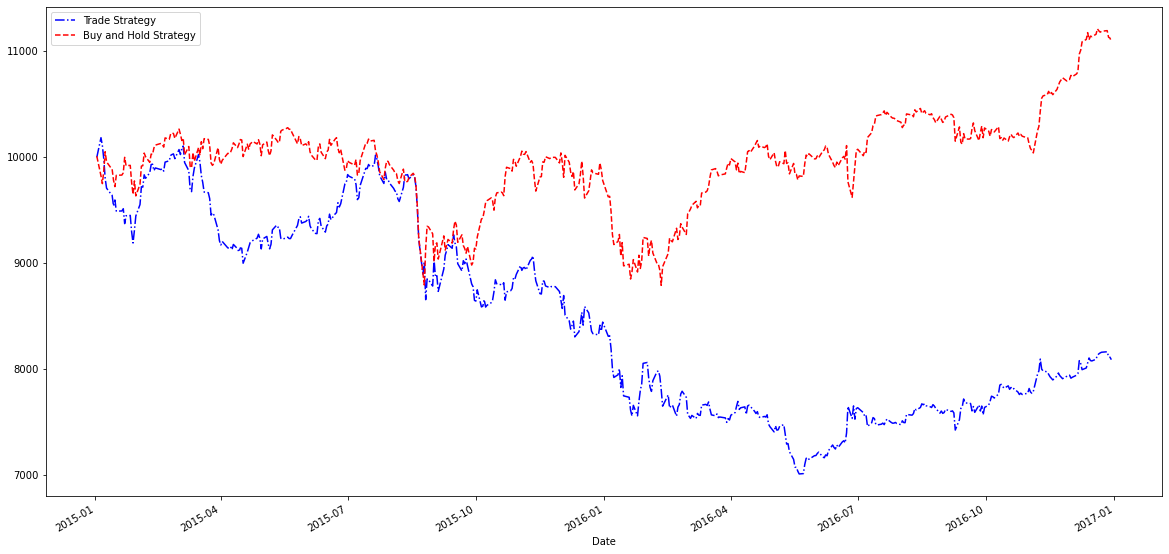

In [133]:
#take a look to compare the buy and hold strategy with the ARIMA Signal
trade_result['Wealth'].plot(figsize = (20, 10), color = 'b', linestyle = '-.', label = 'Trade Strategy')
DJI_result['Wealth'].plot(color = 'r', linestyle = '--', label = 'Buy and Hold Strategy')
plt.legend()

### Return of the Trading Strategy

In [132]:
traderet = (trade_result['Wealth'][-1] - trade_result['Wealth'][0]) / trade_result['Wealth'][0]
stockret = (DJI_result['Wealth'][-1] - DJI_result['Wealth'][0]) / DJI_result['Wealth'][0]
traderet, stockret

(-0.19101211323573192, 0.10820447662899632)

## Conclusion:
#### In this project, we have spent a lot of time displaying to the readers how we can backtest the Dow Jones Industrial Averages(DJI) with the famour ARIMA model. The return is really poor that it causes the people who trade with it losing 19.1% in 2015 - 2016. However, I think it would be a good chance for me to convey the message to the readers - Don't blindly follow the others unless you have backtested the results by yourself in the stock market. In the future, we would build another strategy to trade the market.